In [1]:
# Import libraries
import nltk
import pandas as pd
import string
import random
import re
import io
# Import modules from nltk library
from nltk.corpus import subjectivity,stopwords
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
from nltk import word_tokenize,sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer 
from nltk.sentiment.util import extract_unigram_feats, mark_negation
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer

exclude = set(string.punctuation)

### Read the csv files as dataframe 

In [2]:
biden_df = pd.read_csv("data/JoeBiden_USElec2020.csv")
biden_df['candidate'] = 'Joe Biden'
biden_df.shape

(1010, 5)

In [3]:
biden_df.head()

,UserName,Datetime,Tweet Id,Text,candidate
0,MisterT_333,2020-10-25 23:58:51+00:00,1320515196691963905,Wouldn't be surprised if in 2nd term #realDona...,Joe Biden
1,DesiSilent,2020-10-25 23:58:49+00:00,1320515187829559296,I see hunter tapes thing going on...but questi...,Joe Biden
2,Apike919,2020-10-25 23:57:51+00:00,1320514946904436736,One year ago. \n#COVID19 #JoeBiden #BidenHar...,Joe Biden
3,hocsoc1,2020-10-25 23:57:20+00:00,1320514816113594369,Putin Admires Biden's Dems: Their Values Are C...,Joe Biden
4,BigBlueWaveUSA,2020-10-25 23:56:25+00:00,1320514582083997696,Exactly 1 year ago: #JoeBiden warns Tяump &amp...,Joe Biden


In [4]:
trump_df = pd.read_csv("data/DonaldTrump_USElec2020.csv")
trump_df['candidate'] = 'Donald Trump'
trump_df.shape

(1010, 5)

In [5]:
trump_df.head()

,UserName,Datetime,Tweet Id,Text,candidate
0,MikeHuez,2020-10-25 23:59:57+00:00,1320515471817478145,#60minutes #60MinutesInterview is killing #Tru...,Donald Trump
1,2haveandhavenot,2020-10-25 23:59:56+00:00,1320515471020417024,#Biden #Campaign putting the lid on #Joe.\n\n#...,Donald Trump
2,Mycryptons,2020-10-25 23:59:52+00:00,1320515450636152832,@ThomTillis .@sendavidperdue supports racists ...,Donald Trump
3,FaceTruths,2020-10-25 23:59:50+00:00,1320515444621615111,@60Minutes: You’ve outlived your usefulness. #...,Donald Trump
4,reeionman,2020-10-25 23:59:45+00:00,1320515423788552192,What is wrong with this guy? #mentalhealth #Me...,Donald Trump


### Data Preprocessing and cleaning

In [7]:
# custom madestopword list
my_stopwords=['the','a','an','and','by','for','of','i','im','he','she',
              'me','you','your','they','them','this','that','these','those',
              'is','am','are','was','has','had','have','be','in',
             'what','how','where','why']
#Keep adding words to this list as per the requirement.


In [8]:
biden_df['cleaned_text']=biden_df.Text.map(lambda x : ' '.join([x.lstrip('b')]))
trump_df['cleaned_text']=trump_df.Text.map(lambda x : ' '.join([x.lstrip('b')]))

In [9]:
# remove @, URLs, non-alphanumeric characters,rt
biden_df['cleaned_text']=biden_df.cleaned_text.map(lambda x :''.join(re.sub("(@[\w]+)|(#)|(https?://[A-Za-z0-9./]*)|([0-9]+|\n)|([^0-9A-Za-z!? \t])|(\w+:\/\/\S+)|('rt')",'',x)).lower())
trump_df['cleaned_text']=trump_df.cleaned_text.map(lambda x :''.join(re.sub("(@[\w]+)|(#)|(https?://[A-Za-z0-9./]*)|([0-9]+|\n)|([^0-9A-Za-z!? \t])|(\w+:\/\/\S+)|('rt')",'',x)).lower())


In [50]:
# remove the stopwords and punctuations
biden_df['cleaned_text'] = biden_df['cleaned_text'].map(lambda x : ' '.join([token for token\
                                       in x.split() if token.lower() not in my_stopwords]))
biden_df['cleaned_text'] = biden_df['cleaned_text'].map(lambda x :"".join(ch for ch in x if ch not in exclude))


trump_df['cleaned_text'] = trump_df['cleaned_text'].map(lambda x : ' '.join([token for token\
                                       in x.split() if token.lower() not in my_stopwords]))
trump_df['cleaned_text'] = trump_df['cleaned_text'].map(lambda x :"".join(ch for ch in x if ch not in exclude))

In [10]:
biden_df.head()

,UserName,Datetime,Tweet Id,Text,candidate,cleaned_text
0,MisterT_333,2020-10-25 23:58:51+00:00,1320515196691963905,Wouldn't be surprised if in 2nd term #realDona...,Joe Biden,wouldnt be surprised if in nd term realdonaldt...
1,DesiSilent,2020-10-25 23:58:49+00:00,1320515187829559296,I see hunter tapes thing going on...but questi...,Joe Biden,i see hunter tapes thing going onbut question ...
2,Apike919,2020-10-25 23:57:51+00:00,1320514946904436736,One year ago. \n#COVID19 #JoeBiden #BidenHar...,Joe Biden,one year ago covid joebiden bidenharrislands...
3,hocsoc1,2020-10-25 23:57:20+00:00,1320514816113594369,Putin Admires Biden's Dems: Their Values Are C...,Joe Biden,putin admires bidens dems their values are clo...
4,BigBlueWaveUSA,2020-10-25 23:56:25+00:00,1320514582083997696,Exactly 1 year ago: #JoeBiden warns Tяump &amp...,Joe Biden,exactly year ago joebiden warns tump amp amer...


In [11]:
trump_df.head()

,UserName,Datetime,Tweet Id,Text,candidate,cleaned_text
0,MikeHuez,2020-10-25 23:59:57+00:00,1320515471817478145,#60minutes #60MinutesInterview is killing #Tru...,Donald Trump,minutes minutesinterview is killing trump show...
1,2haveandhavenot,2020-10-25 23:59:56+00:00,1320515471020417024,#Biden #Campaign putting the lid on #Joe.\n\n#...,Donald Trump,biden campaign putting the lid on joefracking ...
2,Mycryptons,2020-10-25 23:59:52+00:00,1320515450636152832,@ThomTillis .@sendavidperdue supports racists ...,Donald Trump,supports racists like also retweet blackliv...
3,FaceTruths,2020-10-25 23:59:50+00:00,1320515444621615111,@60Minutes: You’ve outlived your usefulness. #...,Donald Trump,youve outlived your usefulness trump not allo...
4,reeionman,2020-10-25 23:59:45+00:00,1320515423788552192,What is wrong with this guy? #mentalhealth #Me...,Donald Trump,what is wrong with this guy? mentalhealth ment...


### Generating word cloud for a visual representation of the tweets

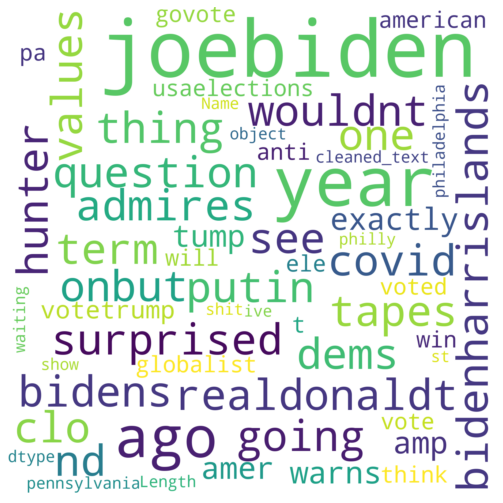

In [12]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
plt.subplots(1,1, figsize=(9,9))
wc_b = WordCloud(stopwords=STOPWORDS, 
                 background_color="white", max_words=2000,
                 max_font_size=256, random_state=42,
                 width=1600, height=1600)
wc_b.generate(str(biden_df['cleaned_text'].dropna()))
plt.imshow(wc_b, interpolation="bilinear")
plt.axis('off')
plt.show()

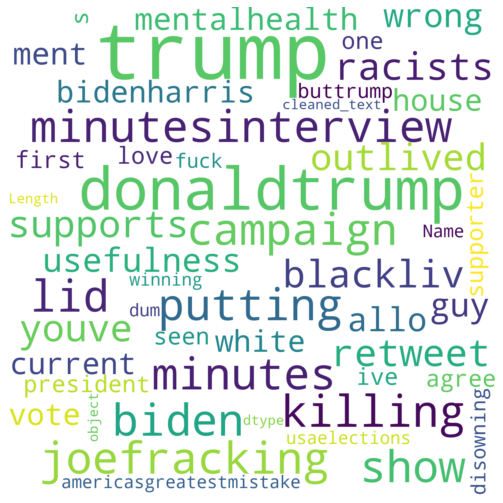

In [13]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
plt.subplots(1,1, figsize=(9,9))
wc_b = WordCloud(stopwords=STOPWORDS, 
                 background_color="white", max_words=2000,
                 max_font_size=256, random_state=42,
                 width=1600, height=1600)
wc_b.generate(str(trump_df['cleaned_text'].dropna()))
plt.imshow(wc_b, interpolation="bilinear")
plt.axis('off')
plt.show()

### VADER sentiment Rule based algorithm -1 

In [18]:
sid = SentimentIntensityAnalyzer()

In [14]:
nltk_tokenizer = nltk.tokenize.RegexpTokenizer('\w+')
lemma = WordNetLemmatizer()
def split(text):
    
    ### Split is used for converting a paragraph into statements
    ### Sentence tokenizer can also be used for sentence split (Alternative)
    text = "".join([ch for ch in text if ord(ch)<= 128])
    sentences = text.split('. ') 

    
    ### regex is used for word split, instead of this word tokenizer can also be usesd
    tokenized_sentences = [nltk_tokenizer.tokenize(sent) for sent in sentences]

    return tokenized_sentences


In [19]:
## Vader sentimental analysis - rule 1

def vaderSentiment_rule1(sentences):
    total_score = 0
    for sentence in split(sentences):
        sentence = " ".join([ch for ch in sentence])
        pos = neg =neu = sent_score= 0

        if sentence=='':
            return 0
        else:
            sent_score = sid.polarity_scores(sentence)
            neg = sent_score['neg']
            pos = sent_score['pos']
            neu = sent_score['neu']
            comp = sent_score['compound']
        
            if pos>=neg and pos>=neu:
                sent_score = 1
            elif neu>=pos and neu>= neg:
                sent_score = 0
            else:
                sent_score = -1
        
        total_score += sent_score
    if total_score>0:
        return 'Positive'
    if total_score<0:
        return 'Negative'
    else:
        return 'Neutral'

In [20]:
biden_df['vd_sentiment_rule1'] = biden_df.cleaned_text.apply(lambda x : vaderSentiment_rule1(x))

In [21]:
trump_df['vd_sentiment_rule1'] = trump_df.cleaned_text.apply(lambda x : vaderSentiment_rule1(x))

### VADER Sentiment - Rule based algorithm 2 - using Compound Score

In [22]:
def vader_compound(sentiment):
    if sentiment['compound'] >= 0.05:
        return "Positive"
    elif sentiment['compound'] <= -0.1:
        return "Negative"
    else:
        return "Neutral"

In [23]:
trump_df['sentiment_score'] = trump_df['cleaned_text'].apply(lambda x: sid.polarity_scores(x))
trump_df['vd_sentiment_compound'] = trump_df['sentiment_score'].apply(lambda x: vader_compound(x))
trump_df.head()

,UserName,Datetime,Tweet Id,Text,candidate,cleaned_text,vd_sentiment_rule1,sentiment_score,vd_sentiment_compound
0,MikeHuez,2020-10-25 23:59:57+00:00,1320515471817478145,#60minutes #60MinutesInterview is killing #Tru...,Donald Trump,minutes minutesinterview is killing trump show...,Neutral,"{'neg': 0.359, 'neu': 0.641, 'pos': 0.0, 'comp...",Negative
1,2haveandhavenot,2020-10-25 23:59:56+00:00,1320515471020417024,#Biden #Campaign putting the lid on #Joe.\n\n#...,Donald Trump,biden campaign putting the lid on joefracking ...,Neutral,"{'neg': 0.0, 'neu': 0.912, 'pos': 0.088, 'comp...",Positive
2,Mycryptons,2020-10-25 23:59:52+00:00,1320515450636152832,@ThomTillis .@sendavidperdue supports racists ...,Donald Trump,supports racists like also retweet blackliv...,Positive,"{'neg': 0.259, 'neu': 0.37, 'pos': 0.37, 'comp...",Positive
3,FaceTruths,2020-10-25 23:59:50+00:00,1320515444621615111,@60Minutes: You’ve outlived your usefulness. #...,Donald Trump,youve outlived your usefulness trump not allo...,Neutral,"{'neg': 0.208, 'neu': 0.688, 'pos': 0.104, 'co...",Negative
4,reeionman,2020-10-25 23:59:45+00:00,1320515423788552192,What is wrong with this guy? #mentalhealth #Me...,Donald Trump,what is wrong with this guy? mentalhealth ment...,Neutral,"{'neg': 0.205, 'neu': 0.795, 'pos': 0.0, 'comp...",Negative


In [24]:
biden_df['sentiment_score'] = biden_df['cleaned_text'].apply(lambda x: sid.polarity_scores(x))
biden_df['vd_sentiment_compound'] = biden_df['sentiment_score'].apply(lambda x: vader_compound(x))
biden_df.head()

,UserName,Datetime,Tweet Id,Text,candidate,cleaned_text,vd_sentiment_rule1,sentiment_score,vd_sentiment_compound
0,MisterT_333,2020-10-25 23:58:51+00:00,1320515196691963905,Wouldn't be surprised if in 2nd term #realDona...,Joe Biden,wouldnt be surprised if in nd term realdonaldt...,Neutral,"{'neg': 0.106, 'neu': 0.894, 'pos': 0.0, 'comp...",Negative
1,DesiSilent,2020-10-25 23:58:49+00:00,1320515187829559296,I see hunter tapes thing going on...but questi...,Joe Biden,i see hunter tapes thing going onbut question ...,Neutral,"{'neg': 0.111, 'neu': 0.762, 'pos': 0.127, 'co...",Neutral
2,Apike919,2020-10-25 23:57:51+00:00,1320514946904436736,One year ago. \n#COVID19 #JoeBiden #BidenHar...,Joe Biden,one year ago covid joebiden bidenharrislands...,Neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
3,hocsoc1,2020-10-25 23:57:20+00:00,1320514816113594369,Putin Admires Biden's Dems: Their Values Are C...,Joe Biden,putin admires bidens dems their values are clo...,Neutral,"{'neg': 0.0, 'neu': 0.816, 'pos': 0.184, 'comp...",Positive
4,BigBlueWaveUSA,2020-10-25 23:56:25+00:00,1320514582083997696,Exactly 1 year ago: #JoeBiden warns Tяump &amp...,Joe Biden,exactly year ago joebiden warns tump amp amer...,Neutral,"{'neg': 0.292, 'neu': 0.708, 'pos': 0.0, 'comp...",Negative


In [25]:
biden_df.vd_sentiment_rule1.value_counts(),biden_df.vd_sentiment_compound.value_counts()

(Neutral     1000
 Positive       6
 Negative       4
 Name: vd_sentiment_rule1, dtype: int64,
 Positive    436
 Neutral     293
 Negative    281
 Name: vd_sentiment_compound, dtype: int64)

In [30]:
trump_df.vd_sentiment_rule1.value_counts(),trump_df.vd_sentiment_compound.value_counts()

(Neutral     978
 Negative     24
 Positive      8
 Name: vd_sentiment_rule1, dtype: int64,
 Negative    422
 Positive    345
 Neutral     243
 Name: vd_sentiment_compound, dtype: int64)

In [41]:
i= 25
print("##### JOE BIDEN #####\n")
print("Raw tweet : ",biden_df.Text[i])
print("\nCleaned tweet : ",biden_df.cleaned_text[i])
print("\nVADER polarity scores : ",biden_df.sentiment_score[i])
print("\nRule-1 Sentiment : ",biden_df.vd_sentiment_rule1[i])
print("\nRule-2 Sentiment : ",biden_df.vd_sentiment_compound[i])

##### JOE BIDEN #####

Raw tweet :  @CBSNews If #JoeBiden wins #Florida it's all over on Election night. No more will he, won't he accept the results. Without #Florida @realDonaldTrump simply cannot win. So PLEASE #VoteEarly #VoteBidenHarris and let's #TurnFloridaBlue #TurnTexasBlue #VoteBlueDownTheBallot 🌊🎃🌊🎃🌊🎃🌊🎃🌊

Cleaned tweet :   if joebiden wins florida its all over on election night no more will he wont he accept the results without florida  simply cannot win so please voteearly votebidenharris and lets turnfloridablue turntexasblue votebluedowntheballot 

VADER polarity scores :  {'neg': 0.177, 'neu': 0.664, 'pos': 0.159, 'compound': 0.0606}

Rule-1 Sentiment :  Neutral

Rule-2 Sentiment :  Positive


In [29]:
i= 489
print("##### DONALD TRUMP #####\n")
print("Raw tweet : ",trump_df.Text[i])
print("\nCleaned tweet : ",trump_df.cleaned_text[i])
print("\nVADER polarity scores : ",trump_df.sentiment_score[i])
print("\nRule-1 Sentiment : ",trump_df.vd_sentiment_rule1[i])
print("\nRule-2 Sentiment : ",trump_df.vd_sentiment_compound[i])

##### DONALD TRUMP #####

Raw tweet :  @Savvy_1of1 @senatemajtr8tr @FoxNews Dr Umar Johnson was right about these celebrities. Kanye West, Ice Cube, 50 Cent and Lil Wayne endorsing Donald Trump is embarrassing - they should be ashamed of themselves... #LilWayne #DonaldTrump https://t.co/2ayNQVnCD6

Cleaned tweet :     dr umar johnson was right about these celebrities kanye west ice cube  cent and lil wayne endorsing donald trump is embarrassing  they should be ashamed of themselves lilwayne donaldtrump 

VADER polarity scores :  {'neg': 0.174, 'neu': 0.826, 'pos': 0.0, 'compound': -0.6908}

Rule-1 Sentiment :  Neutral

Rule-2 Sentiment :  Negative


### merging the two dataframes

In [31]:
all_df = biden_df.append(trump_df,ignore_index=True)
all_df.shape

(2020, 9)

In [32]:
all_df.loc[all_df.candidate=='Joe Biden']['vd_sentiment_compound']

0       Negative
1        Neutral
2        Neutral
3       Positive
4       Negative
          ...   
1005    Negative
1006    Positive
1007     Neutral
1008     Neutral
1009    Negative
Name: vd_sentiment_compound, Length: 1010, dtype: object

### Classifying Trump tweet sentiments as the complementary tweet sentiments for Biden

In [33]:
all_df.loc[all_df.candidate=='Joe Biden','Biden_sentiment']=all_df.loc[all_df.candidate=='Joe Biden']['vd_sentiment_compound']


In [34]:
all_df.loc[((all_df.candidate=='Donald Trump')&(all_df.vd_sentiment_compound=='Positive')),'Biden_sentiment']='Negative'
all_df.loc[((all_df.candidate=='Donald Trump')&(all_df.vd_sentiment_compound=='Negative')),'Biden_sentiment']='Positive'
all_df.Biden_sentiment.fillna('Neutral',inplace=True)

In [35]:
all_df.Biden_sentiment.value_counts()

Positive    858
Negative    626
Neutral     536
Name: Biden_sentiment, dtype: int64

In [36]:
all_df

,UserName,Datetime,Tweet Id,Text,candidate,cleaned_text,vd_sentiment_rule1,sentiment_score,vd_sentiment_compound,Biden_sentiment
0,MisterT_333,2020-10-25 23:58:51+00:00,1320515196691963905,Wouldn't be surprised if in 2nd term #realDona...,Joe Biden,wouldnt be surprised if in nd term realdonaldt...,Neutral,"{'neg': 0.106, 'neu': 0.894, 'pos': 0.0, 'comp...",Negative,Negative
1,DesiSilent,2020-10-25 23:58:49+00:00,1320515187829559296,I see hunter tapes thing going on...but questi...,Joe Biden,i see hunter tapes thing going onbut question ...,Neutral,"{'neg': 0.111, 'neu': 0.762, 'pos': 0.127, 'co...",Neutral,Neutral
2,Apike919,2020-10-25 23:57:51+00:00,1320514946904436736,One year ago. \n#COVID19 #JoeBiden #BidenHar...,Joe Biden,one year ago covid joebiden bidenharrislands...,Neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral,Neutral
3,hocsoc1,2020-10-25 23:57:20+00:00,1320514816113594369,Putin Admires Biden's Dems: Their Values Are C...,Joe Biden,putin admires bidens dems their values are clo...,Neutral,"{'neg': 0.0, 'neu': 0.816, 'pos': 0.184, 'comp...",Positive,Positive
4,BigBlueWaveUSA,2020-10-25 23:56:25+00:00,1320514582083997696,Exactly 1 year ago: #JoeBiden warns Tяump &amp...,Joe Biden,exactly year ago joebiden warns tump amp amer...,Neutral,"{'neg': 0.292, 'neu': 0.708, 'pos': 0.0, 'comp...",Negative,Negative
...,...,...,...,...,...,...,...,...,...,...
2015,DARK_CITY,2020-11-03 23:56:30+00:00,1323776097704706050,#Trump #BidenHarris2020 #Vote2020 The current ...,Donald Trump,trump bidenharris vote the current white house...,Neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral,Neutral
2016,BenjReports,2020-11-03 23:56:25+00:00,1323776073360986117,"President Trump supporter, first one I’ve seen...",Donald Trump,president trump supporter first one ive seen s...,Neutral,"{'neg': 0.05, 'neu': 0.785, 'pos': 0.165, 'com...",Positive,Negative
2017,SupplyChainLisa,2020-11-03 23:56:24+00:00,1323776070894669827,@theNP @molly_knight I so agree--- I love this...,Donald Trump,i so agree i love this buttrump is disowning...,Neutral,"{'neg': 0.144, 'neu': 0.48, 'pos': 0.377, 'com...",Positive,Negative
2018,localasshole1,2020-11-03 23:56:22+00:00,1323776064385130497,Fuck #DonaldTrump. #AmericasGreatestMistake ...,Donald Trump,fuck donaldtrump americasgreatestmistake dum...,Neutral,"{'neg': 0.28, 'neu': 0.72, 'pos': 0.0, 'compou...",Negative,Positive


<AxesSubplot:xlabel='Biden_sentiment'>

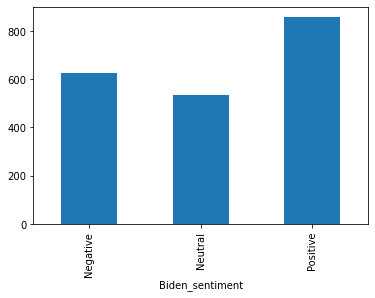

In [37]:
all_df.groupby('Biden_sentiment').size().plot(kind='bar')


In [38]:
all_df[all_df.candidate=='Joe Biden'].groupby('vd_sentiment_compound')['vd_sentiment_compound'].count()

vd_sentiment_compound
Negative    281
Neutral     293
Positive    436
Name: vd_sentiment_compound, dtype: int64

In [39]:
all_df[all_df.candidate=='Donald Trump'].groupby('vd_sentiment_compound')['vd_sentiment_compound'].count()

vd_sentiment_compound
Negative    422
Neutral     243
Positive    345
Name: vd_sentiment_compound, dtype: int64

In [40]:
all_df.to_excel("sentiment_labelled_data.xlsx",index=False)